# 02. 탐색적 데이터 분석 (Exploratory Data Analysis - EDA)

## 📌 이 노트북의 목적
- 전처리된 데이터를 시각화하여 패턴과 인사이트를 발견합니다
- 다양한 그래프를 그려서 데이터의 특성을 이해합니다
- 머신러닝 모델링 전에 데이터를 충분히 이해합니다

## 📊 분석 내용
1. 제품 분석 (가격, 카테고리, 브랜드)
2. 리뷰 분석 (평점, 시간대, 감성)
3. 피부 타입 분석
4. 브랜드 분석
5. 텍스트 분석 (워드클라우드)
6. 상관관계 분석

---

## 1. 라이브러리 임포트 및 데이터 로드

In [1]:
# ============================================================
# 1-1. 필요한 라이브러리 임포트
# ============================================================

# 데이터 처리
import pandas as pd
import numpy as np

# 시각화 라이브러리
import matplotlib.pyplot as plt       # 기본 그래프
import seaborn as sns                 # 예쁜 통계 그래프
import plotly.express as px           # 인터랙티브 그래프
import plotly.graph_objects as go
from wordcloud import WordCloud       # 워드클라우드

# 기타
import warnings
from collections import Counter       # 빈도수 계산

# 설정
warnings.filterwarnings('ignore')
%matplotlib inline

# 한글 폰트 설정 (그래프에서 한글이 깨지지 않도록)
# Windows의 경우
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# seaborn 스타일 설정
sns.set_style('whitegrid')            # 흰색 배경에 격자
sns.set_palette('husl')               # 색상 팔레트

print("✅ 라이브러리 임포트 완료!")

✅ 라이브러리 임포트 완료!


In [2]:
# ============================================================
# 1-2. 전처리된 데이터 로드
# ============================================================
# 01_data_preprocessing.ipynb에서 저장한 깨끗한 데이터를 불러옵니다

print("📂 전처리된 데이터를 불러오는 중...\n")

# 제품 데이터 로드
products = pd.read_csv('cleaned_products.csv')
print(f"✅ 제품 데이터 로드 완료: {products.shape[0]:,}개 제품")

# 리뷰 데이터 로드
reviews = pd.read_csv('cleaned_reviews.csv')
print(f"✅ 리뷰 데이터 로드 완료: {reviews.shape[0]:,}개 리뷰")

# 날짜 컬럼을 다시 datetime 타입으로 변환
if 'submission_time' in reviews.columns:
    reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

print("\n" + "="*80)

📂 전처리된 데이터를 불러오는 중...

✅ 제품 데이터 로드 완료: 8,494개 제품
✅ 리뷰 데이터 로드 완료: 1,092,966개 리뷰



---
## 2. 제품 분석

### 2.1 가격 분포 분석
- 제품들의 가격대가 어떻게 분포되어 있는지 확인합니다
- 대부분의 제품이 어느 가격대에 속하는지 파악합니다

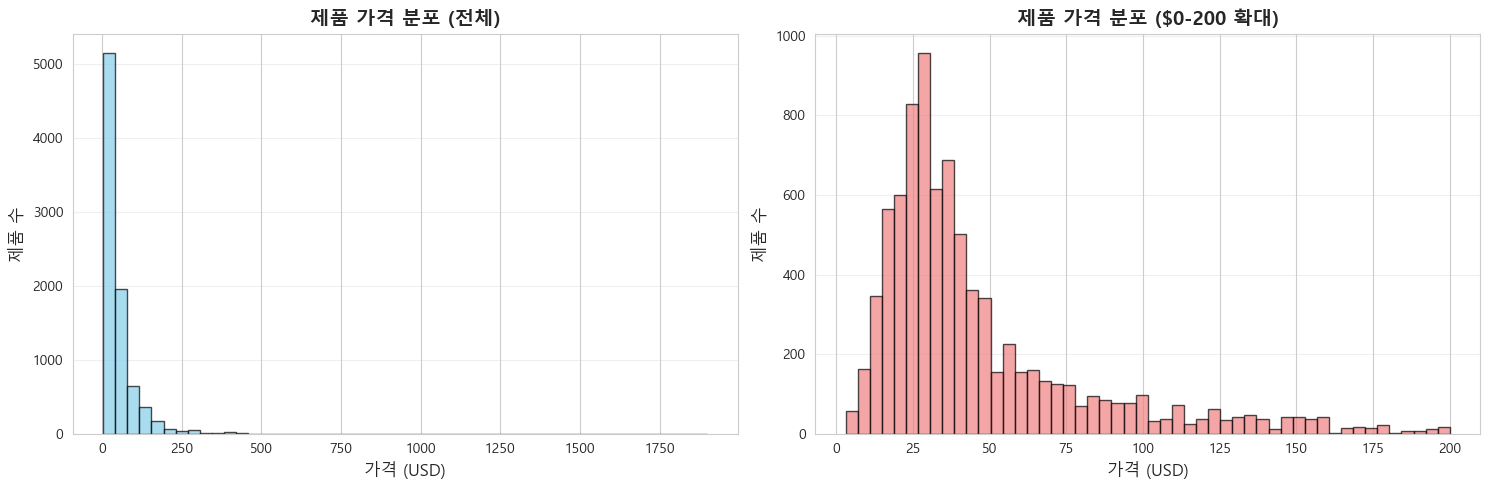


📊 가격 통계:
  평균 가격: $51.66
  중간 가격: $35.00
  최저 가격: $3.00
  최고 가격: $1900.00
  표준편차: $53.67


In [20]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [수정된 부분] 한글 폰트 및 마이너스 기호 설정
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic') # 윈도우: 맑은 고딕
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')   # 맥: 애플고딕

plt.rc('axes', unicode_minus=False) # 마이너스(-) 기호 깨짐 방지


# ============================================================
# 2.1.1 가격 분포 - 히스토그램
# ============================================================
# 히스토그램: 데이터를 구간별로 나누어 빈도를 표시하는 그래프

# 그래프 크기 설정 (가로 15인치, 세로 5인치)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# subplots(1, 2): 1행 2열로 그래프를 나란히 배치

# 왼쪽 그래프: 전체 가격 분포
# .hist(): 히스토그램 그리기
# bins=50: 50개의 구간으로 나누기
# color: 막대 색상
# edgecolor: 막대 테두리 색상
# alpha: 투명도
axes[0].hist(products['price_usd'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('제품 가격 분포 (전체)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('가격 (USD)', fontsize=12)
axes[0].set_ylabel('제품 수', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# 오른쪽 그래프: $0-200 구간만 확대
# 대부분의 제품이 저가~중가에 몰려있어서 확대해서 봅니다
price_filtered = products[products['price_usd'] <= 200]['price_usd']
axes[1].hist(price_filtered, bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('제품 가격 분포 ($0-200 확대)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('가격 (USD)', fontsize=12)
axes[1].set_ylabel('제품 수', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# 레이아웃 자동 조정
plt.tight_layout()
plt.show()

# 가격 통계 출력
print("\n📊 가격 통계:")
print(f"  평균 가격: ${products['price_usd'].mean():.2f}")
print(f"  중간 가격: ${products['price_usd'].median():.2f}")
print(f"  최저 가격: ${products['price_usd'].min():.2f}")
print(f"  최고 가격: ${products['price_usd'].max():.2f}")
print(f"  표준편차: ${products['price_usd'].std():.2f}")

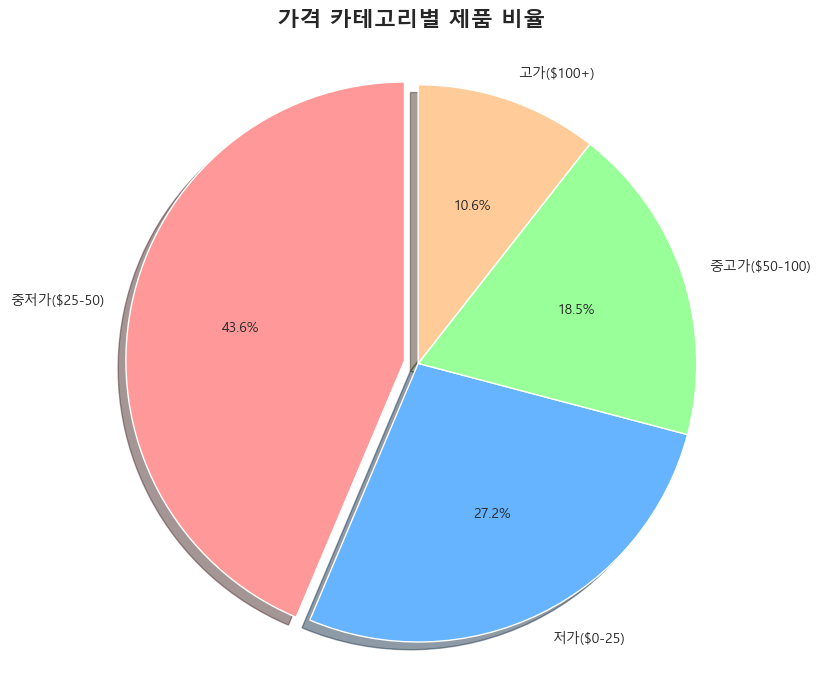


📊 가격 카테고리별 제품 수:
  중저가($25-50): 3,707개 (43.6%)
  저가($0-25): 2,314개 (27.2%)
  중고가($50-100): 1,575개 (18.5%)
  고가($100+): 898개 (10.6%)


In [21]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 2.1.2 가격 카테고리별 분포 - 파이 차트
# ============================================================
# 파이 차트: 전체에서 각 항목이 차지하는 비율을 보여주는 원 그래프

if 'price_category' in products.columns:
    # 가격 카테고리별 제품 수
    price_cat_counts = products['price_category'].value_counts()
    
    # 그래프 그리기
    plt.figure(figsize=(10, 8))
    
    # 파이 차트 그리기
    # autopct='%1.1f%%': 각 조각에 비율 표시 (소수점 1자리)
    # startangle=90: 12시 방향부터 시작
    # explode: 특정 조각을 약간 떼어내기 (강조 효과)
    colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
    
    # (주의) explode는 데이터 개수(카테고리 수)와 길이가 같아야 에러가 안 납니다.
    # 만약 카테고리가 4개가 아니라면 아래 줄에서 에러가 날 수 있으니, 
    # 그럴 땐 len(price_cat_counts)에 맞춰서 explode 리스트를 만들어주는 것이 좋습니다.
    # 일단 원본 코드의 의도대로 4개 기준(0.05, 0, 0, 0)을 유지합니다.
    explode = (0.05, 0, 0, 0) if len(price_cat_counts) == 4 else None 
    
    plt.pie(price_cat_counts, 
            labels=price_cat_counts.index, 
            autopct='%1.1f%%',
            colors=colors,
            explode=explode,
            shadow=True,
            startangle=90)
    
    plt.title('가격 카테고리별 제품 비율', fontsize=16, fontweight='bold', pad=20)
    plt.axis('equal')  # 원을 정원으로 만들기
    plt.show()
    
    print("\n📊 가격 카테고리별 제품 수:")
    for category, count in price_cat_counts.items():
        percentage = (count / len(products)) * 100
        print(f"  {category}: {count:,}개 ({percentage:.1f}%)")

### 2.2 카테고리 분석
- 어떤 제품 카테고리가 가장 많은지 확인합니다
- 주요 카테고리별 제품 수를 시각화합니다

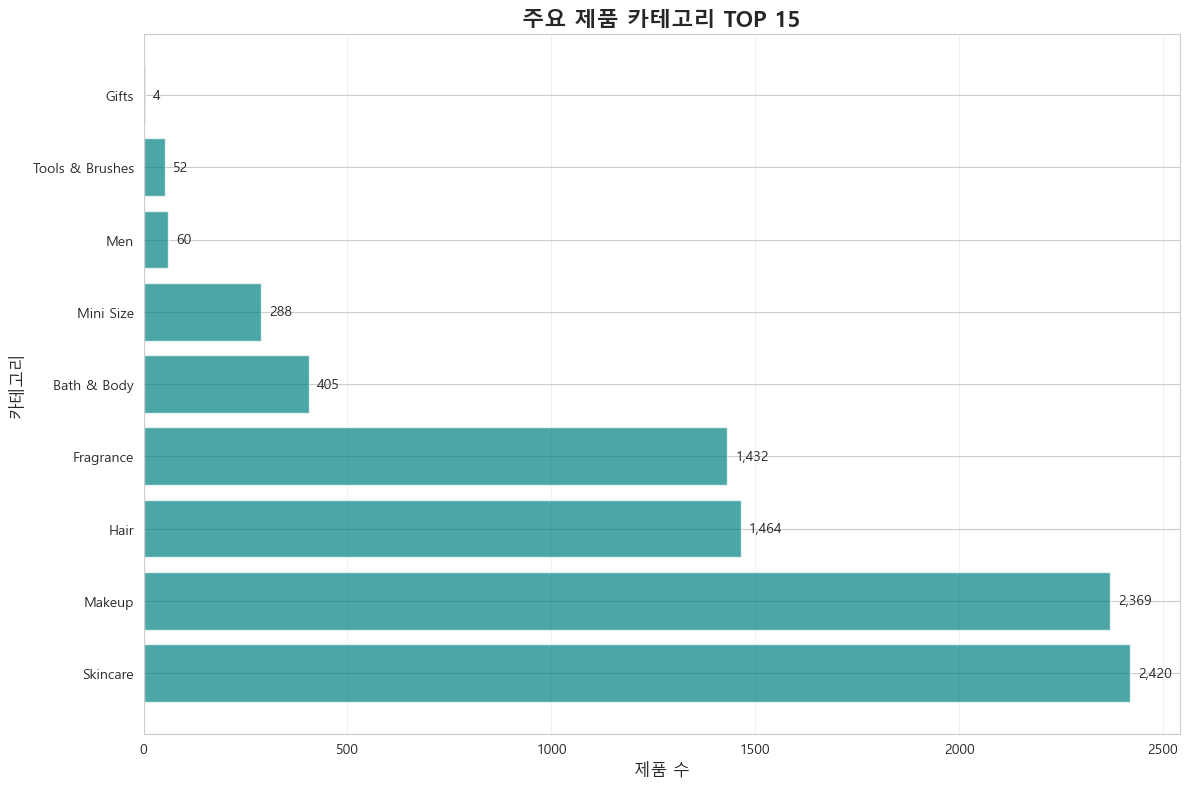


📊 전체 카테고리 수: 9개
   가장 많은 카테고리: Skincare (2,420개)


In [22]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic') # 윈도우
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')   # 맥

plt.rc('axes', unicode_minus=False)


# ============================================================
# 2.2.1 주요 카테고리(primary_category) 분포
# ============================================================

if 'primary_category' in products.columns:
    # 카테고리별 제품 수 계산
    category_counts = products['primary_category'].value_counts().head(15)
    # .head(15): 상위 15개만 선택
    
    # 가로 막대 그래프 그리기
    plt.figure(figsize=(12, 8))
    
    # .barh(): 가로 막대 그래프
    # 세로 막대는 .bar(), 가로 막대는 .barh()
    # 가로 막대가 이름이 길 때 보기 좋습니다
    bars = plt.barh(range(len(category_counts)), category_counts.values, color='teal', alpha=0.7)
    
    # y축 눈금에 카테고리 이름 설정
    plt.yticks(range(len(category_counts)), category_counts.index)
    
    # 각 막대 끝에 숫자 표시
    for i, (bar, value) in enumerate(zip(bars, category_counts.values)):
        # enumerate(): 인덱스와 값을 동시에 가져오기
        # zip(): 두 리스트를 동시에 순회
        plt.text(value + 20, i, f'{value:,}', va='center', fontsize=10)
    
    plt.title('주요 제품 카테고리 TOP 15', fontsize=16, fontweight='bold')
    plt.xlabel('제품 수', fontsize=12)
    plt.ylabel('카테고리', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    
    # [팁] 가로 막대 그래프는 보통 1위가 맨 위에 오게 하려면 축을 뒤집어야 합니다.
    # 만약 순서가 거꾸로(1위가 맨 아래) 나온다면 아래 주석(#)을 지우고 실행해보세요.
    # plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 전체 카테고리 수: {products['primary_category'].nunique()}개")
    print(f"   가장 많은 카테고리: {category_counts.index[0]} ({category_counts.values[0]:,}개)")

### 2.3 브랜드 분석
- 어떤 브랜드가 가장 많은 제품을 가지고 있는지 확인합니다
- 인기 있는 브랜드를 파악합니다

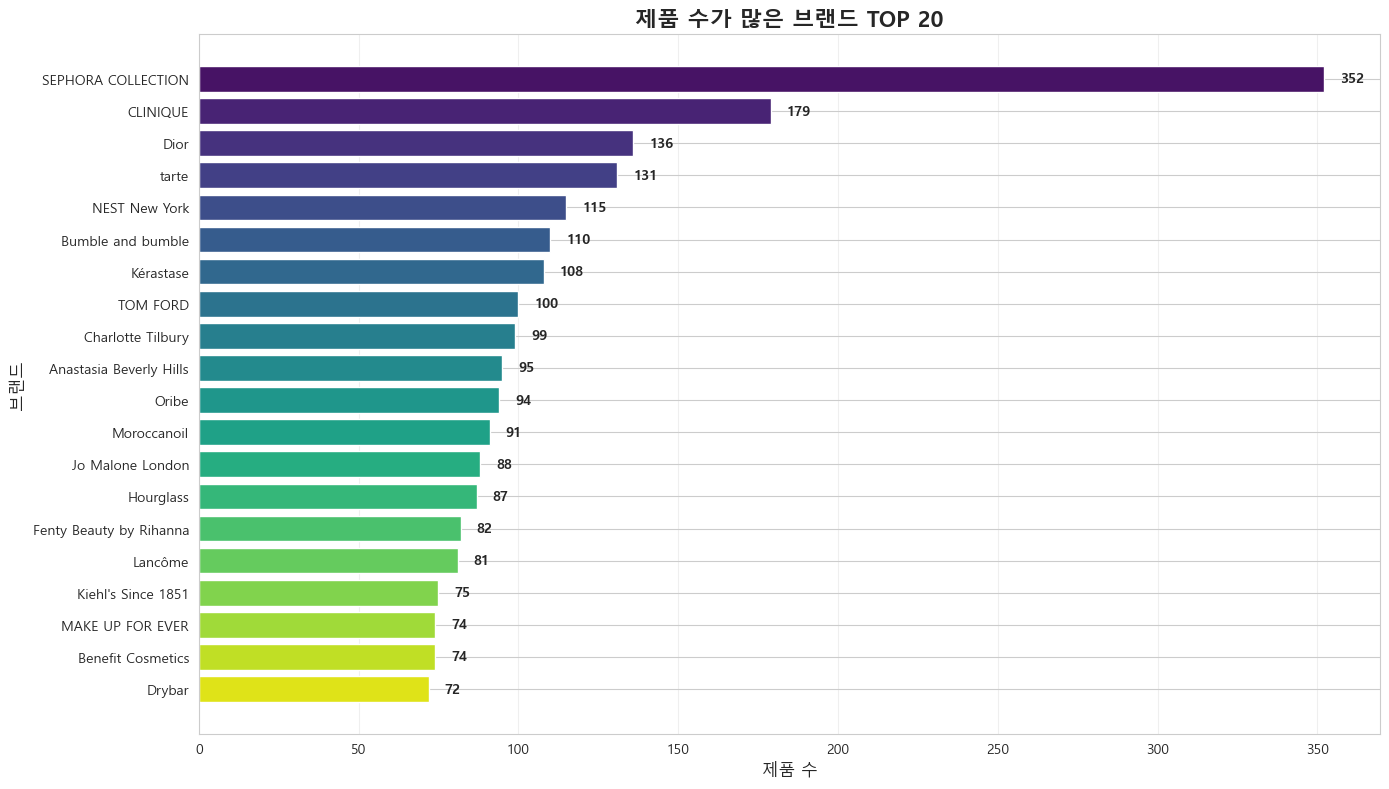


📊 전체 브랜드 수: 304개


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns  # sns.color_palette 사용을 위해 필요
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 2.3.1 제품 수가 많은 브랜드 TOP 20
# ============================================================

# 브랜드별 제품 수
brand_counts = products['brand_name'].value_counts().head(20)

plt.figure(figsize=(14, 8))

# 막대 그래프 그리기
# color=sns.color_palette('viridis', ...): 데이터를 시각적으로 구분하기 좋은 색상 조합 사용
bars = plt.barh(range(len(brand_counts)), brand_counts.values, 
                color=sns.color_palette('viridis', len(brand_counts)))

plt.yticks(range(len(brand_counts)), brand_counts.index)

# 막대 끝에 숫자 표시
for i, (bar, value) in enumerate(zip(bars, brand_counts.values)):
    plt.text(value + 5, i, f'{value}', va='center', fontsize=10, fontweight='bold')

plt.title('제품 수가 많은 브랜드 TOP 20', fontsize=16, fontweight='bold')
plt.xlabel('제품 수', fontsize=12)
plt.ylabel('브랜드', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# (선택) 1위 브랜드가 맨 위에 오도록 축 반전
plt.gca().invert_yaxis() 

plt.tight_layout()
plt.show()

print(f"\n📊 전체 브랜드 수: {products['brand_name'].nunique():,}개")

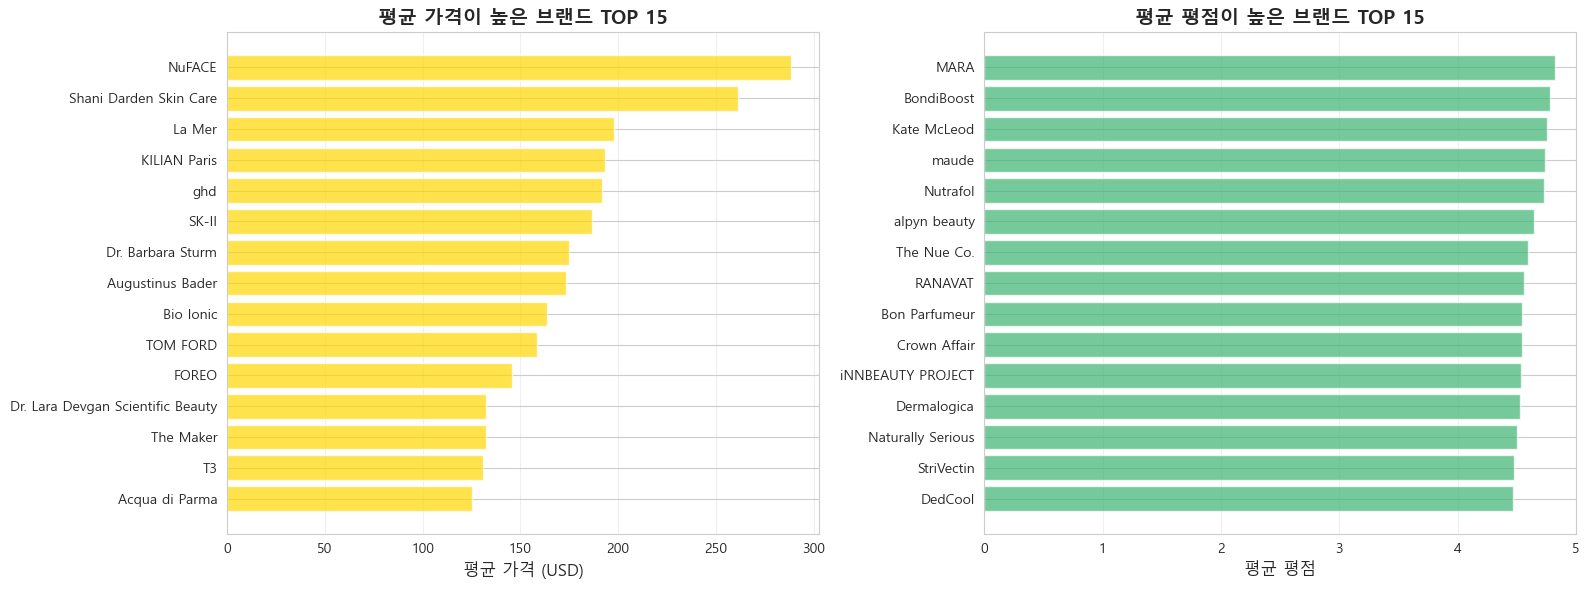

In [24]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 2.3.2 브랜드별 평균 가격과 평균 평점
# ============================================================
# 어떤 브랜드가 비싸면서도 평점이 높은지 확인합니다

# 브랜드별 평균 계산
# .groupby(): 그룹별로 묶어서 계산
# .agg(): 여러 통계량을 동시에 계산
if 'brand_name' in products.columns:
    brand_stats = products.groupby('brand_name').agg({
        'price_usd': 'mean',      # 평균 가격
        'rating': 'mean',          # 평균 평점
        'product_id': 'count'      # 제품 수
    }).rename(columns={'product_id': 'product_count'})
    
    # 제품이 10개 이상인 브랜드만 선택 (통계적으로 의미있는 브랜드)
    brand_stats = brand_stats[brand_stats['product_count'] >= 10]
    
    # 평균 가격이 높은 상위 15개 브랜드
    top_expensive = brand_stats.nlargest(15, 'price_usd')
    
    # 그래프 그리기
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 왼쪽: 평균 가격
    axes[0].barh(range(len(top_expensive)), top_expensive['price_usd'], color='gold', alpha=0.7)
    axes[0].set_yticks(range(len(top_expensive)))
    axes[0].set_yticklabels(top_expensive.index)
    axes[0].set_title('평균 가격이 높은 브랜드 TOP 15', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('평균 가격 (USD)', fontsize=12)
    axes[0].grid(axis='x', alpha=0.3)
    axes[0].invert_yaxis()  # [추가] 1위가 맨 위에 오도록 순서 뒤집기
    
    # 오른쪽: 평균 평점
    top_rated = brand_stats[brand_stats['rating'] > 0].nlargest(15, 'rating')
    axes[1].barh(range(len(top_rated)), top_rated['rating'], color='mediumseagreen', alpha=0.7)
    axes[1].set_yticks(range(len(top_rated)))
    axes[1].set_yticklabels(top_rated.index)
    axes[1].set_title('평균 평점이 높은 브랜드 TOP 15', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('평균 평점', fontsize=12)
    axes[1].set_xlim(0, 5)  # x축 범위를 0-5로 설정
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].invert_yaxis()  # [추가] 1위가 맨 위에 오도록 순서 뒤집기
    
    plt.tight_layout()
    plt.show()

### 2.4 가격과 평점의 관계
- 비싼 제품일수록 평점이 높을까요?
- 산점도(Scatter Plot)로 두 변수의 관계를 확인합니다

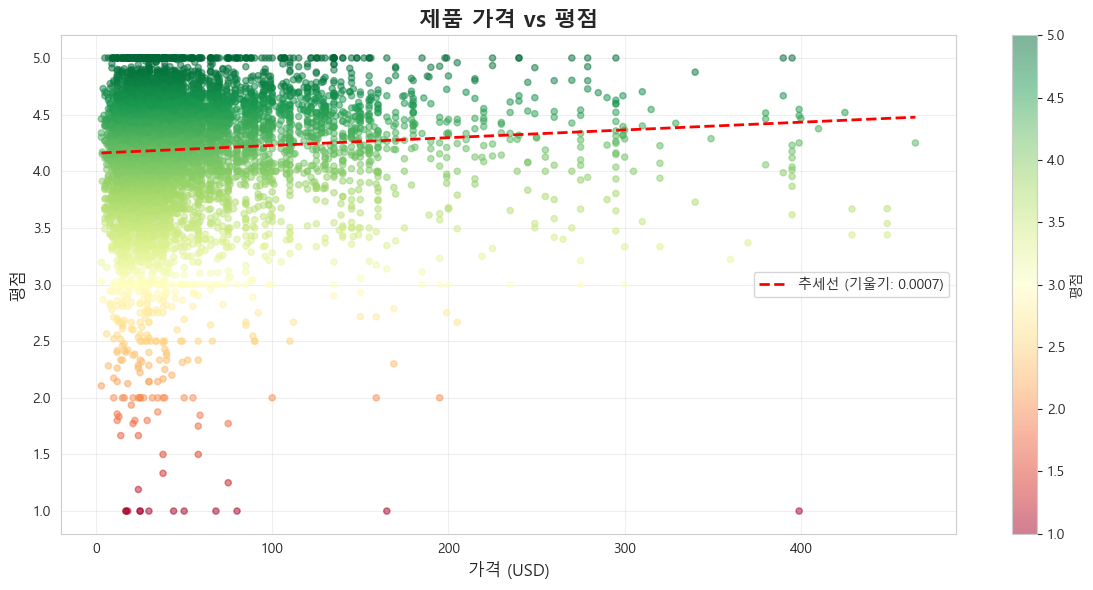


📊 가격과 평점의 상관계수: 0.0653
   → 약한 상관관계 (거의 관계가 없음)


In [25]:
import matplotlib.pyplot as plt
import numpy as np  # 수학 계산(추세선)을 위해 필수!
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 2.4.1 가격 vs 평점 산점도
# ============================================================
# 산점도(Scatter Plot): 두 변수의 관계를 점으로 표시하는 그래프

# 평점이 0인 제품(리뷰가 없는 제품) 제외
products_with_rating = products[products['rating'] > 0]

# 이상치 제거 (가격이 $500 이하인 제품만)
products_filtered = products_with_rating[products_with_rating['price_usd'] <= 500]

plt.figure(figsize=(12, 6))

# 산점도 그리기
# alpha=0.5: 점이 겹칠 때 투명하게 (밀도를 볼 수 있음)
# s=20: 점의 크기
plt.scatter(products_filtered['price_usd'], 
           products_filtered['rating'],
           alpha=0.5, 
           s=20,
           c=products_filtered['rating'],  # 평점에 따라 색상 다르게
           cmap='RdYlGn')                  # Red-Yellow-Green 색상 맵

# 컬러바 추가 (색상 범례)
plt.colorbar(label='평점')

# 추세선 추가 (선형 회귀)
# np.polyfit(): 다항식 회귀 계수 계산 (1차 = 직선)
z = np.polyfit(products_filtered['price_usd'], products_filtered['rating'], 1)
p = np.poly1d(z)  # 다항식 함수 생성

# [수정] 추세선을 깔끔한 직선으로 그리기 위해 x값을 정렬합니다.
sorted_x = np.sort(products_filtered['price_usd']) 

plt.plot(sorted_x, 
         p(sorted_x), 
         "r--", 
         linewidth=2, 
         label=f'추세선 (기울기: {z[0]:.4f})')

plt.title('제품 가격 vs 평점', fontsize=16, fontweight='bold')
plt.xlabel('가격 (USD)', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 상관계수 계산
# 상관계수: 두 변수의 선형 관계 강도 (-1 ~ 1)
correlation = products_filtered['price_usd'].corr(products_filtered['rating'])
print(f"\n📊 가격과 평점의 상관계수: {correlation:.4f}")

if abs(correlation) < 0.3:
    print("   → 약한 상관관계 (거의 관계가 없음)")
elif abs(correlation) < 0.7:
    print("   → 중간 상관관계")
else:
    print("   → 강한 상관관계")

---
## 3. 리뷰 분석

### 3.1 평점 분포
- 사용자들이 주로 어떤 평점을 주는지 확인합니다
- 평점이 긍정적인지 부정적인지 파악합니다

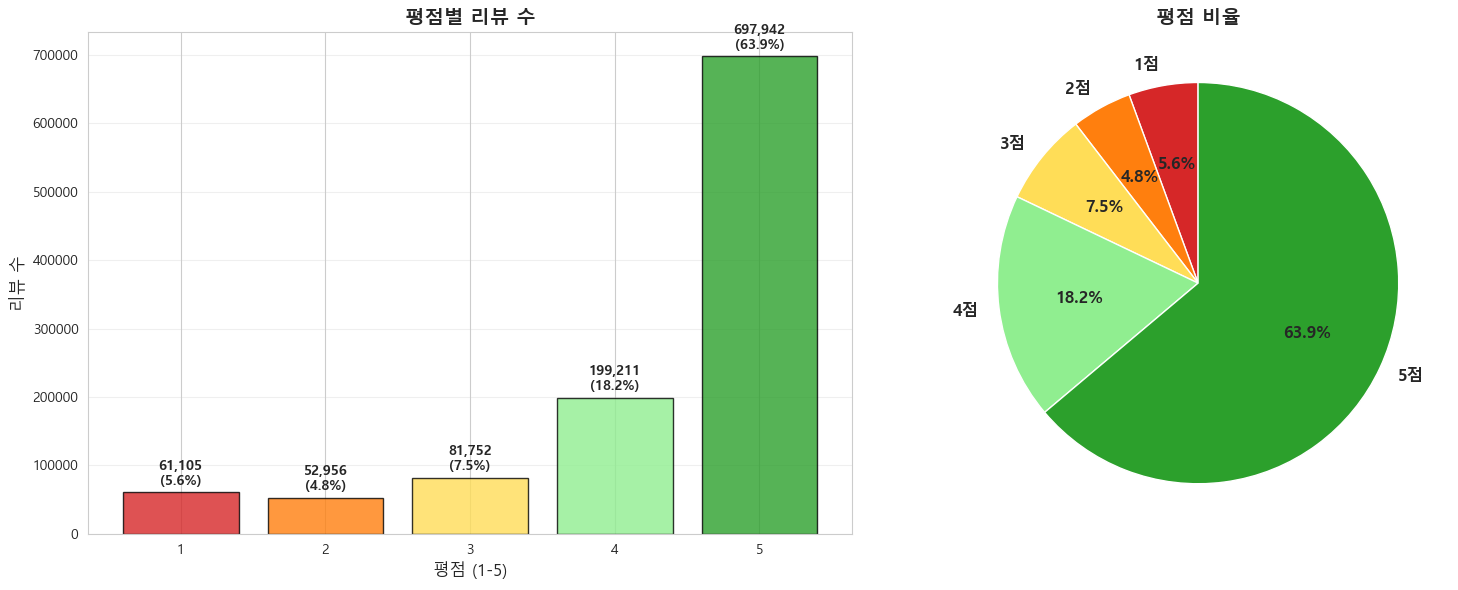


📊 평점 통계:
  평균 평점: 4.30점
  중간 평점: 5.0점
  최빈 평점: 5점

  5점 리뷰: 697,942개 (63.9%)
  4-5점 (긍정): 897,153개 (82.1%)
  1-2점 (부정): 114,061개 (10.4%)


In [27]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 3.1.1 리뷰 평점 분포
# ============================================================

# 평점별 리뷰 수
# (주의: reviews 데이터프레임이 미리 로드되어 있어야 합니다)
if 'rating' in reviews.columns:
    rating_counts = reviews['rating'].value_counts().sort_index()
    
    # 그래프 2개 그리기
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 왼쪽: 막대 그래프
    colors = ['#d62728', '#ff7f0e', '#ffdd57', '#90EE90', '#2ca02c']
    axes[0].bar(rating_counts.index, rating_counts.values, color=colors, alpha=0.8, edgecolor='black')
    axes[0].set_title('평점별 리뷰 수', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('평점 (1-5)', fontsize=12)
    axes[0].set_ylabel('리뷰 수', fontsize=12)
    axes[0].set_xticks([1, 2, 3, 4, 5])
    axes[0].grid(axis='y', alpha=0.3)
    
    # 막대 위에 비율 표시
    total_reviews = len(reviews)
    for rating, count in rating_counts.items():
        percentage = (count / total_reviews) * 100
        axes[0].text(rating, count + total_reviews*0.01, 
                    f'{count:,}\n({percentage:.1f}%)', 
                    ha='center', 
                    fontsize=10,
                    fontweight='bold')
    
    # 오른쪽: 파이 차트
    axes[1].pie(rating_counts.values, 
                labels=[f'{i}점' for i in rating_counts.index],
                autopct='%1.1f%%',
                colors=colors,
                startangle=90,
                textprops={'fontsize': 12, 'fontweight': 'bold'})
    axes[1].set_title('평점 비율', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("\n📊 평점 통계:")
    print(f"  평균 평점: {reviews['rating'].mean():.2f}점")
    print(f"  중간 평점: {reviews['rating'].median():.1f}점")
    # 최빈값(mode)은 시리즈 형태라 [0]으로 첫 번째 값을 가져옵니다
    print(f"  최빈 평점: {reviews['rating'].mode()[0]}점")
    
    # .get(key, 0)은 해당 점수가 없을 경우 에러 대신 0을 반환합니다 (안전한 코드)
    cnt_5 = rating_counts.get(5, 0)
    cnt_4 = rating_counts.get(4, 0)
    cnt_2 = rating_counts.get(2, 0)
    cnt_1 = rating_counts.get(1, 0)
    
    print(f"\n  5점 리뷰: {cnt_5:,}개 ({cnt_5/total_reviews*100:.1f}%)")
    print(f"  4-5점 (긍정): {(cnt_4 + cnt_5):,}개 ({(cnt_4 + cnt_5)/total_reviews*100:.1f}%)")
    print(f"  1-2점 (부정): {(cnt_1 + cnt_2):,}개 ({(cnt_1 + cnt_2)/total_reviews*100:.1f}%)")

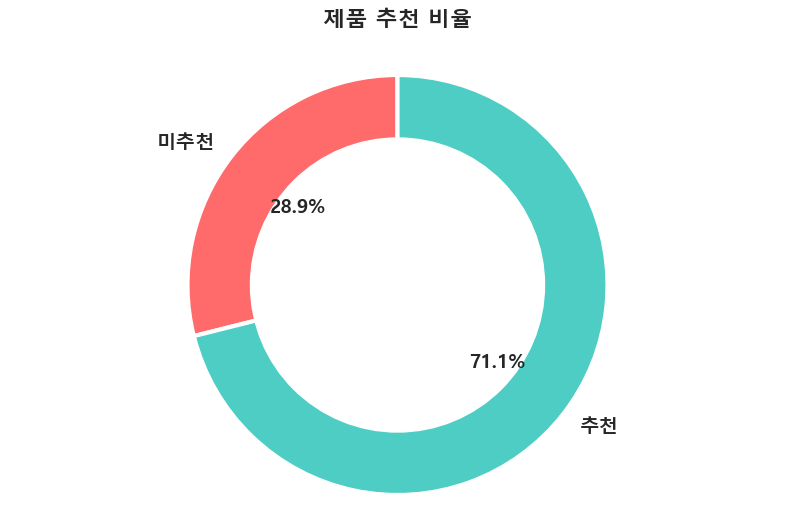


📊 추천 통계:
  추천 리뷰: 776,965개 (71.1%)
  미추천 리뷰: 316,001개 (28.9%)


In [28]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 3.1.2 리뷰 추천 비율
# ============================================================
# 사용자들이 얼마나 많은 제품을 추천하는지 확인합니다

if 'is_recommended' in reviews.columns:
    # [수정] .sort_index()를 추가하여 False(0, 미추천) -> True(1, 추천) 순서로 정렬합니다.
    # 이렇게 해야 아래 labels_rec 리스트의 순서와 데이터가 정확히 일치합니다.
    recommended_counts = reviews['is_recommended'].value_counts().sort_index()
    
    plt.figure(figsize=(10, 6))
    
    # 도넛 차트 그리기 (가운데가 빈 파이 차트)
    colors_rec = ['#ff6b6b', '#4ecdc4'] # 미추천(붉은색), 추천(청록색)
    labels_rec = ['미추천', '추천']
    
    # wedgeprops: 도넛 모양을 만들기 위한 설정
    plt.pie(recommended_counts.values,
           labels=labels_rec,
           autopct='%1.1f%%',
           colors=colors_rec,
           startangle=90,
           textprops={'fontsize': 14, 'fontweight': 'bold'},
           wedgeprops={'edgecolor': 'white', 'linewidth': 3})
    
    # 가운데 원 그리기 (도넛 효과)
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.title('제품 추천 비율', fontsize=16, fontweight='bold', pad=20)
    plt.axis('equal')
    plt.show()
    
    print(f"\n📊 추천 통계:")
    # 인덱스에 True/False가 있는지 확인 후 출력
    if True in recommended_counts.index:
        rec_count = recommended_counts[True]
        rec_percent = (rec_count / len(reviews)) * 100
        print(f"  추천 리뷰: {rec_count:,}개 ({rec_percent:.1f}%)")
        
    if False in recommended_counts.index:
        not_rec_count = recommended_counts[False]
        not_rec_percent = (not_rec_count / len(reviews)) * 100
        print(f"  미추천 리뷰: {not_rec_count:,}개 ({not_rec_percent:.1f}%)")

### 3.2 시간대별 리뷰 추이
- 시간이 지남에 따라 리뷰 수가 어떻게 변화했는지 확인합니다

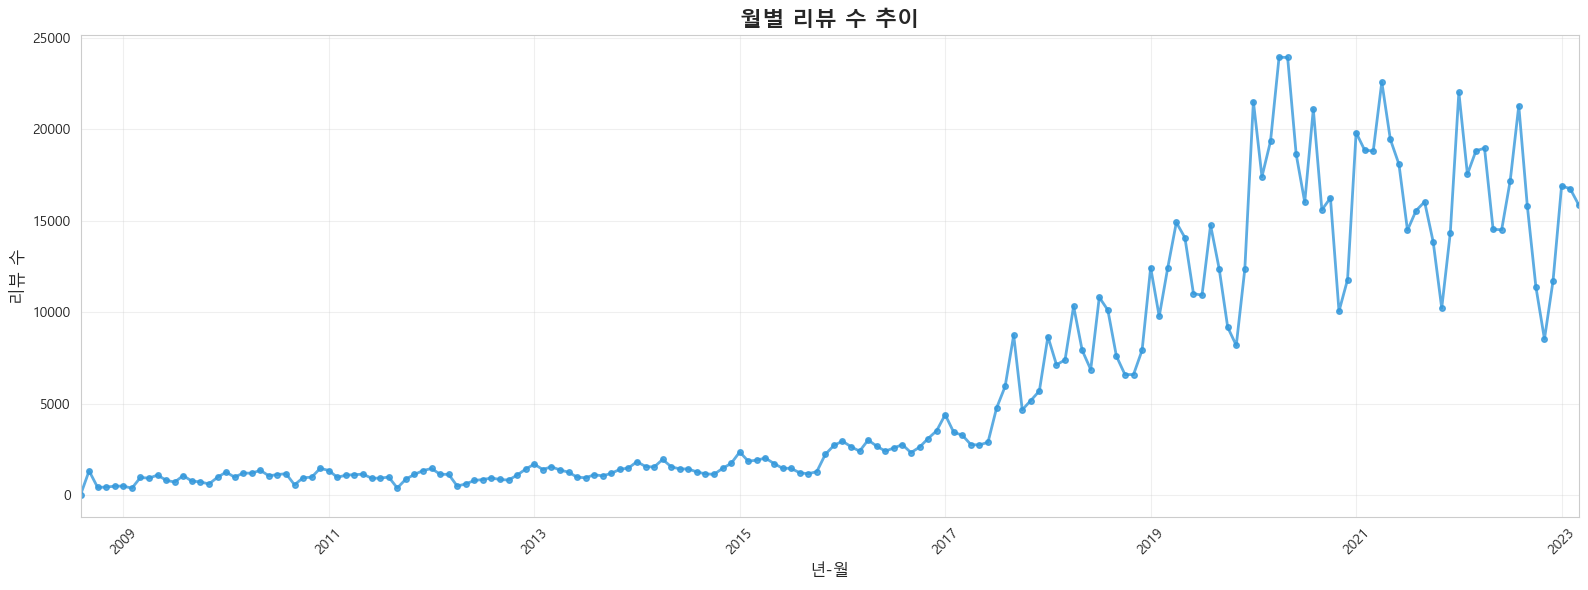


📊 리뷰 추이:
  가장 많은 리뷰가 작성된 월: 2020-04 (23,924개)
  가장 적은 리뷰가 작성된 월: 2008-08 (28개)


In [29]:
import matplotlib.pyplot as plt
import pandas as pd  # 날짜 변환을 위해 필요
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 3.2.1 월별 리뷰 수 추이
# ============================================================

if 'submission_time' in reviews.columns:
    # [안전장치 추가] 날짜 컬럼을 확실하게 날짜(datetime) 형식으로 변환
    # (원본 데이터가 문자열일 경우 .dt 접근자에서 에러가 날 수 있음)
    reviews['submission_time'] = pd.to_datetime(reviews['submission_time'], errors='coerce')

    # 년-월 형식으로 그룹화
    # dt.to_period('M'): 날짜를 월 단위로 변환
    reviews['year_month'] = reviews['submission_time'].dt.to_period('M')
    
    # 월별 리뷰 수 계산
    monthly_reviews = reviews.groupby('year_month').size()
    
    # 선 그래프 그리기
    plt.figure(figsize=(16, 6))
    
    # .plot(): 선 그래프 (line plot)
    # pandas의 plot 기능을 사용하면 x축 날짜 라벨을 자동으로 예쁘게 처리해줍니다.
    monthly_reviews.plot(kind='line', 
                        color='#3498db', 
                        linewidth=2, 
                        marker='o',      # 점 표시
                        markersize=4,    # 점 크기
                        alpha=0.8)
    
    plt.title('월별 리뷰 수 추이', fontsize=16, fontweight='bold')
    plt.xlabel('년-월', fontsize=12)
    plt.ylabel('리뷰 수', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45) # x축 글씨 45도 회전
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 리뷰 추이:")
    # idxmax(): 최대값을 가진 인덱스(여기선 월) 반환
    print(f"  가장 많은 리뷰가 작성된 월: {monthly_reviews.idxmax()} ({monthly_reviews.max():,}개)")
    print(f"  가장 적은 리뷰가 작성된 월: {monthly_reviews.idxmin()} ({monthly_reviews.min():,}개)")

### 3.3 리뷰 길이 분석
- 리뷰 텍스트의 길이가 평점과 관련이 있는지 확인합니다

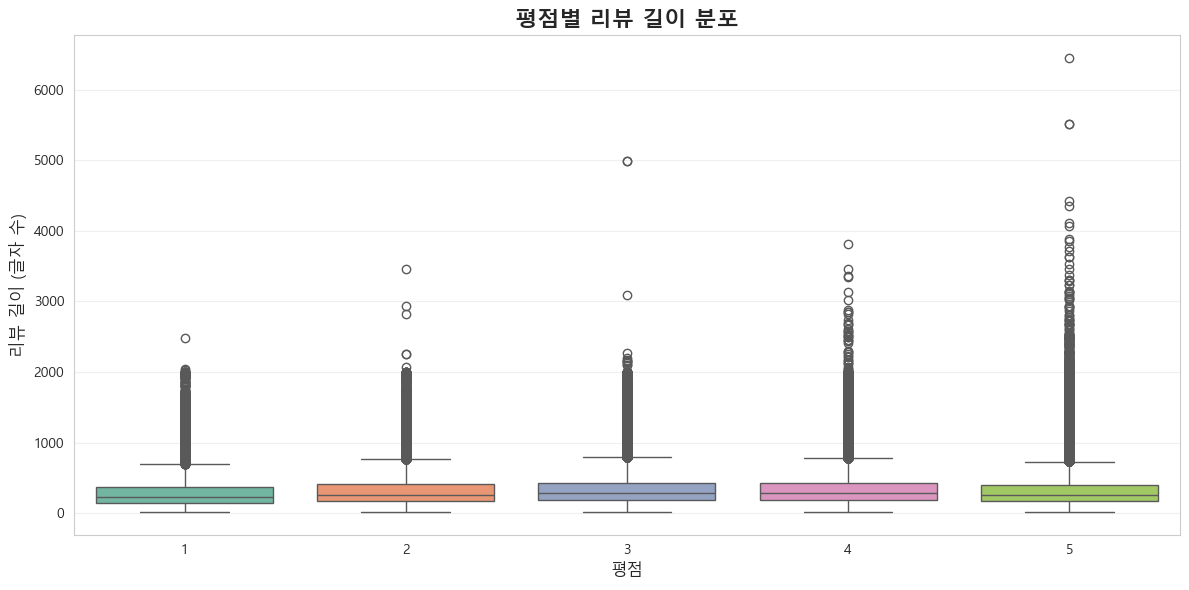


📊 평점별 평균 리뷰 길이:
  1점: 285.6자
  2점: 319.7자
  3점: 340.8자
  4점: 341.1자
  5점: 315.5자


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns  # 박스플롯(sns.boxplot) 사용을 위해 필수
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 3.3.1 평점별 리뷰 길이 분포
# ============================================================
# 박스플롯(Box Plot): 데이터의 분포를 상자 모양으로 표시
#   - 상자 안의 선: 중간값
#   - 상자의 아래/위: 25%, 75% 지점
#   - 수염: 최소/최대 (이상치 제외)
#   - 점: 이상치 (유난히 길거나 짧은 리뷰)

if 'review_length' in reviews.columns:
    plt.figure(figsize=(12, 6))
    
    # seaborn의 박스플롯
    # x='rating': x축에 평점
    # y='review_length': y축에 리뷰 길이
    sns.boxplot(data=reviews, 
                x='rating', 
                y='review_length',
                palette='Set2')   # 부드러운 파스텔톤 색상
    
    plt.title('평점별 리뷰 길이 분포', fontsize=16, fontweight='bold')
    plt.xlabel('평점', fontsize=12)
    plt.ylabel('리뷰 길이 (글자 수)', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    
    # [팁] 혹시 리뷰 길이가 너무 긴 이상치(점) 때문에 상자가 너무 작게 보인다면,
    # 아래 주석을 풀고 y축 범위를 제한해보세요. (예: 0~500자까지만 보기)
    # plt.ylim(0, 500)
    
    plt.tight_layout()
    plt.show()
    
    # 평점별 평균 리뷰 길이
    avg_length_by_rating = reviews.groupby('rating')['review_length'].mean()
    
    print("\n📊 평점별 평균 리뷰 길이:")
    for rating, length in avg_length_by_rating.items():
        print(f"  {rating}점: {length:.1f}자")

---
## 4. 피부 타입 분석

### 4.1 피부 타입 분포
- 어떤 피부 타입의 사용자가 가장 많은지 확인합니다

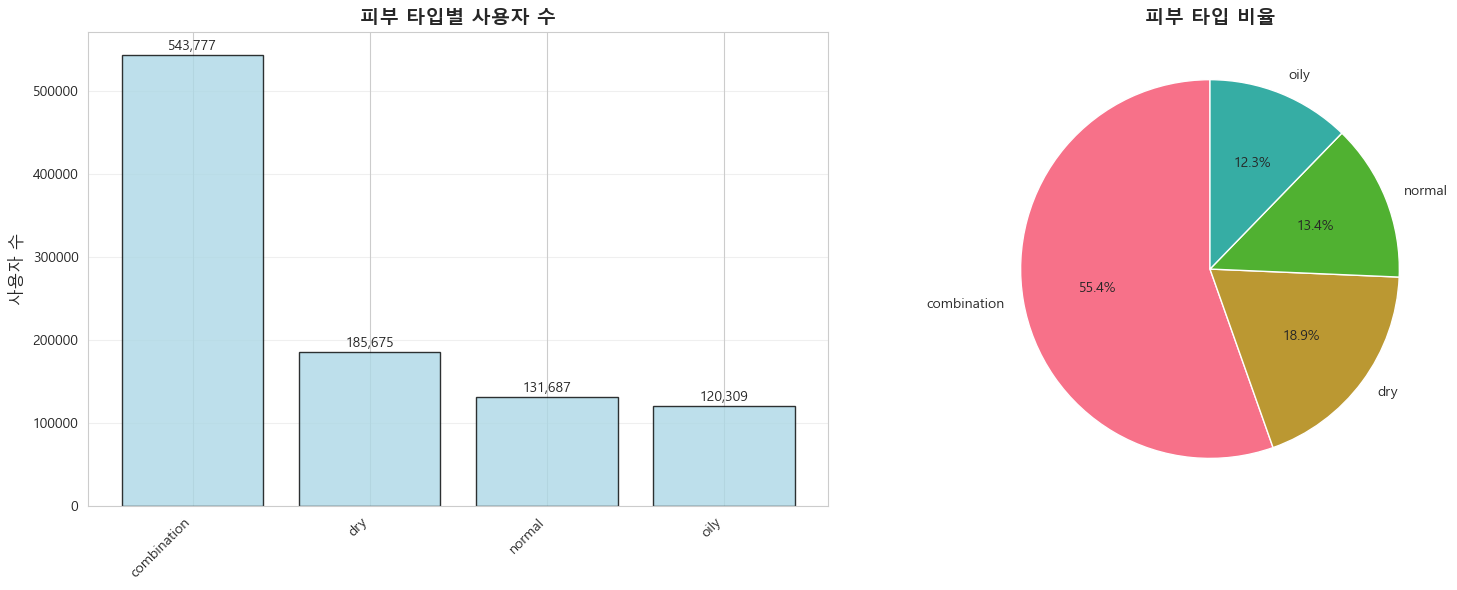


📊 가장 많은 피부 타입: combination (543,777명)


In [31]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 4.1.1 피부 타입 분포
# ============================================================

if 'skin_type' in reviews.columns:
    # 'unknown' 제외
    skin_types = reviews[reviews['skin_type'] != 'unknown']['skin_type'].value_counts()
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 왼쪽: 막대 그래프
    axes[0].bar(range(len(skin_types)), skin_types.values, color='lightblue', alpha=0.8, edgecolor='black')
    axes[0].set_xticks(range(len(skin_types)))
    axes[0].set_xticklabels(skin_types.index, rotation=45, ha='right')
    axes[0].set_title('피부 타입별 사용자 수', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('사용자 수', fontsize=12)
    axes[0].grid(axis='y', alpha=0.3)
    
    # 막대 위에 숫자 표시
    for i, value in enumerate(skin_types.values):
        axes[0].text(i, value + max(skin_types.values)*0.01, 
                    f'{value:,}', 
                    ha='center', 
                    fontsize=10)
    
    # 오른쪽: 파이 차트
    # (색상이 밋밋하지 않게 seaborn 파스텔톤 컬러셋 적용 권장하지만, 일단 기본값 유지)
    axes[1].pie(skin_types.values,
               labels=skin_types.index,
               autopct='%1.1f%%',
               startangle=90)
    axes[1].set_title('피부 타입 비율', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 가장 많은 피부 타입: {skin_types.index[0]} ({skin_types.values[0]:,}명)")

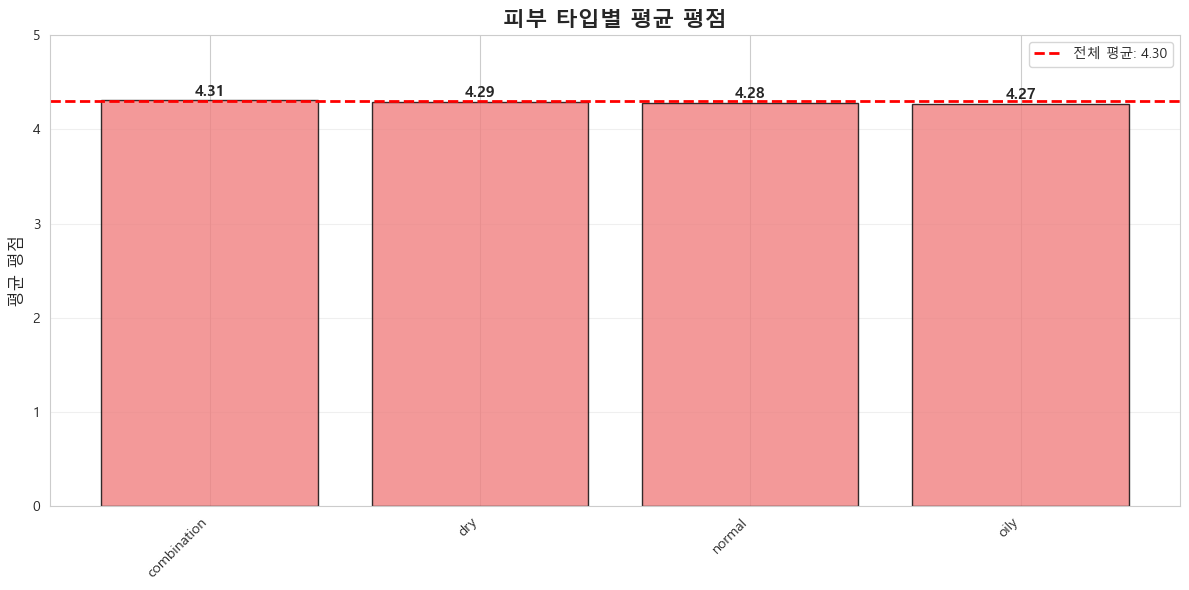

In [32]:
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 4.1.2 피부 타입별 평균 평점
# ============================================================
# 피부 타입에 따라 제품에 대한 만족도가 다른지 확인합니다

if 'skin_type' in reviews.columns:
    # 'unknown' 제외하고 평균 평점 계산
    skin_type_rating = reviews[reviews['skin_type'] != 'unknown'].groupby('skin_type')['rating'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    
    bars = plt.bar(range(len(skin_type_rating)), 
                   skin_type_rating.values, 
                   color='lightcoral', 
                   alpha=0.8, 
                   edgecolor='black')
    
    plt.xticks(range(len(skin_type_rating)), skin_type_rating.index, rotation=45, ha='right')
    plt.title('피부 타입별 평균 평점', fontsize=16, fontweight='bold')
    plt.ylabel('평균 평점', fontsize=12)
    plt.ylim(0, 5) # 평점은 최대 5점이므로 y축 고정
    plt.grid(axis='y', alpha=0.3)
    
    # 막대 위에 평점 표시
    for i, value in enumerate(skin_type_rating.values):
        plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=11, fontweight='bold')
    
    # 전체 평균 평점 선 추가 (비교용)
    avg_rating = reviews['rating'].mean()
    plt.axhline(y=avg_rating, color='red', linestyle='--', linewidth=2, label=f'전체 평균: {avg_rating:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

---
## 5. 텍스트 분석 - 워드클라우드

### 워드클라우드(Word Cloud)란?
- 텍스트에서 자주 나오는 단어를 크게 표시하는 시각화 방법입니다
- 단어의 크기가 클수록 많이 언급되었다는 뜻입니다

### 고평점 vs 저평점 리뷰 비교
- 긍정적인 리뷰와 부정적인 리뷰에서 어떤 단어가 많이 나오는지 비교합니다

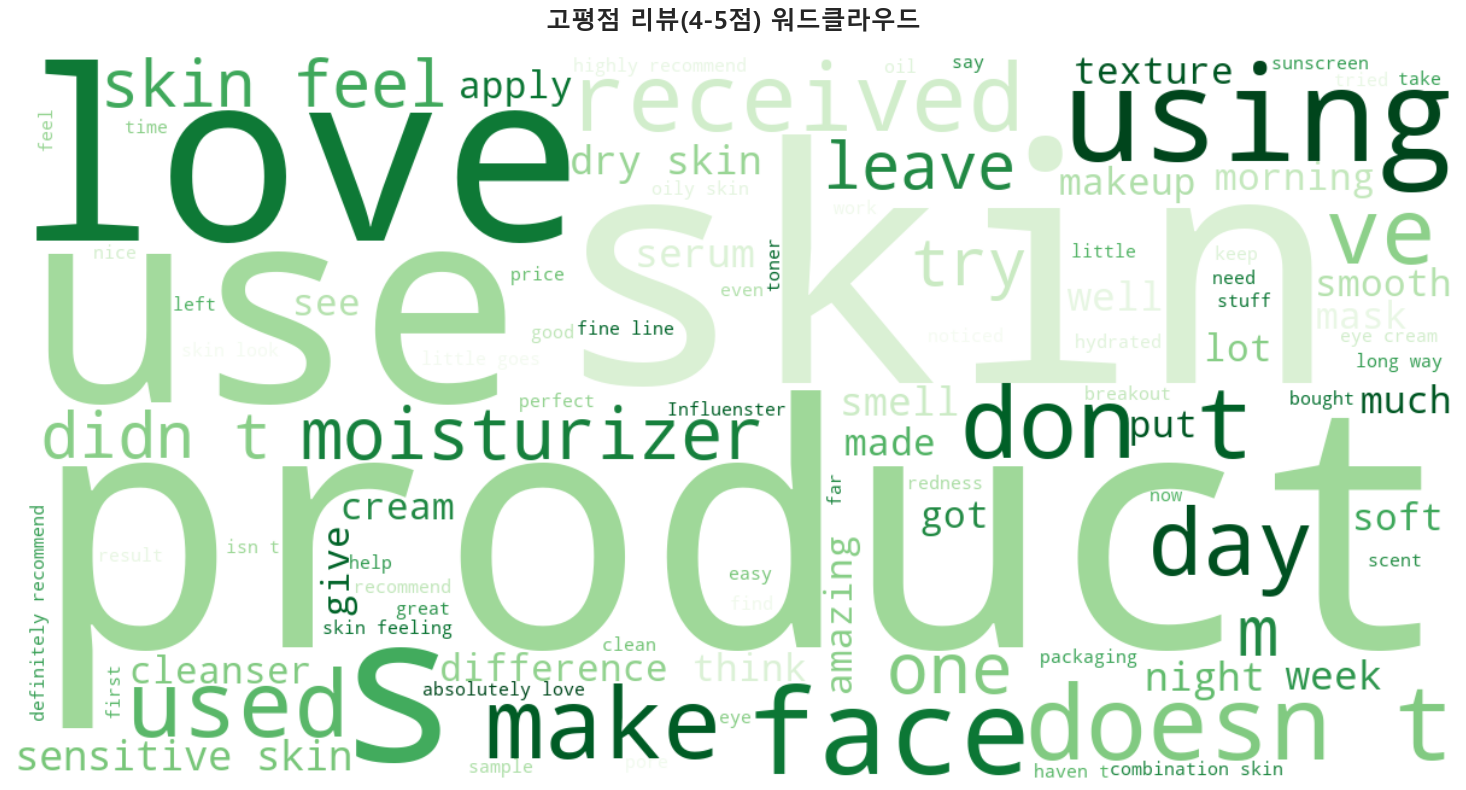


📊 분석된 고평점 리뷰 수: 897,153개


In [34]:
from wordcloud import WordCloud  # 워드클라우드 생성을 위해 필수!
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 5.1 고평점 리뷰 워드클라우드 (4-5점)
# ============================================================

if 'review_text' in reviews.columns:
    # 4-5점 리뷰만 선택
    high_rating_reviews = reviews[reviews['rating'] >= 4]['review_text']
    
    # 모든 리뷰를 하나의 긴 문자열로 합치기
    # .str.cat(): 문자열들을 연결 (concatenate)
    # sep=' ': 공백으로 구분
    # [수정] 데이터가 비어있을 경우를 대비해 fillna('') 추가
    text_high = ' '.join(high_rating_reviews.fillna('').astype(str))
    
    # 워드클라우드 생성
    # (참고) 만약 리뷰 내용 자체가 '한글'이라면, 아래 WordCloud(...) 안에 
    # font_path='C:/Windows/Fonts/malgun.ttf' 옵션을 추가해야 글자가 안 깨집니다.
    # 리뷰가 영어라면 현재 설정대로 잘 나옵니다.
    wordcloud_high = WordCloud(
        width=1200,                  # 그림 너비
        height=600,                  # 그림 높이
        background_color='white',    # 배경색
        colormap='Greens',           # 색상 (초록색 계열)
        max_words=100,               # 최대 단어 수
        relative_scaling=0.5,        # 단어 크기 비율
        min_font_size=10             # 최소 글자 크기
    ).generate(text_high)
    
    # 그래프 그리기
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud_high, interpolation='bilinear')
    plt.title('고평점 리뷰(4-5점) 워드클라우드', fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')  # 축 숨기기
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 분석된 고평점 리뷰 수: {len(high_rating_reviews):,}개")

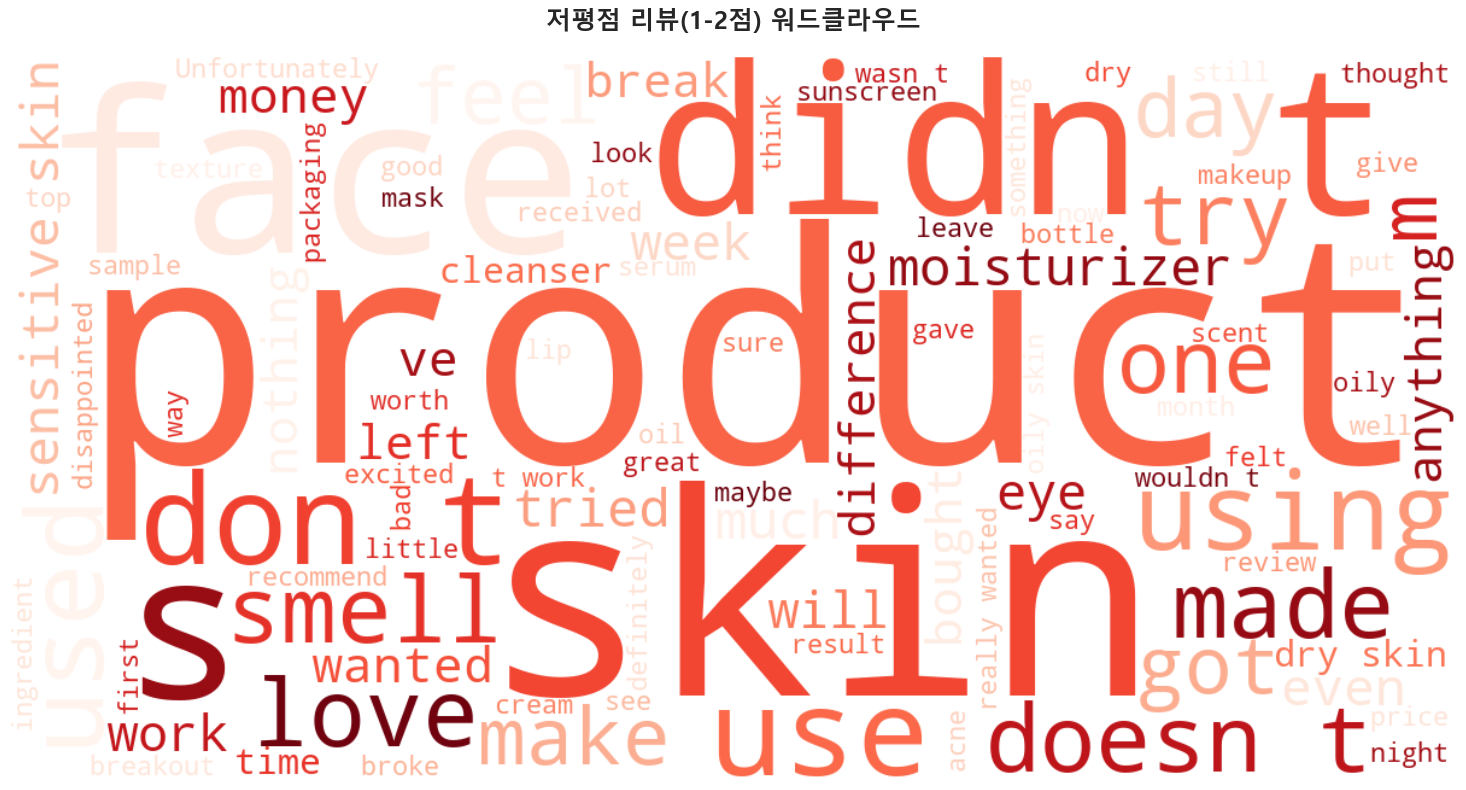


📊 분석된 저평점 리뷰 수: 114,061개


In [35]:
from wordcloud import WordCloud  # 필수 임포트
import matplotlib.pyplot as plt
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 5.2 저평점 리뷰 워드클라우드 (1-2점)
# ============================================================

if 'review_text' in reviews.columns:
    # 1-2점 리뷰만 선택
    low_rating_reviews = reviews[reviews['rating'] <= 2]['review_text']
    
    # [수정] 빈 값(NaN)이 있으면 에러가 날 수 있어 빈 문자열('')로 채운 후 합칩니다.
    text_low = ' '.join(low_rating_reviews.fillna('').astype(str))
    
    # 워드클라우드 생성
    wordcloud_low = WordCloud(
        width=1200,
        height=600,
        background_color='white',
        colormap='Reds',             # 색상 (빨간색 계열 - 부정적 느낌)
        max_words=100,
        relative_scaling=0.5,
        min_font_size=10
    ).generate(text_low)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud_low, interpolation='bilinear')
    plt.title('저평점 리뷰(1-2점) 워드클라우드', fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 분석된 저평점 리뷰 수: {len(low_rating_reviews):,}개")

---
## 6. 상관관계 분석

### 상관관계 히트맵(Correlation Heatmap)
- 여러 변수들 간의 상관관계를 한눈에 볼 수 있는 그래프입니다
- 색이 진할수록 상관관계가 강합니다
- 빨간색: 양의 상관관계, 파란색: 음의 상관관계

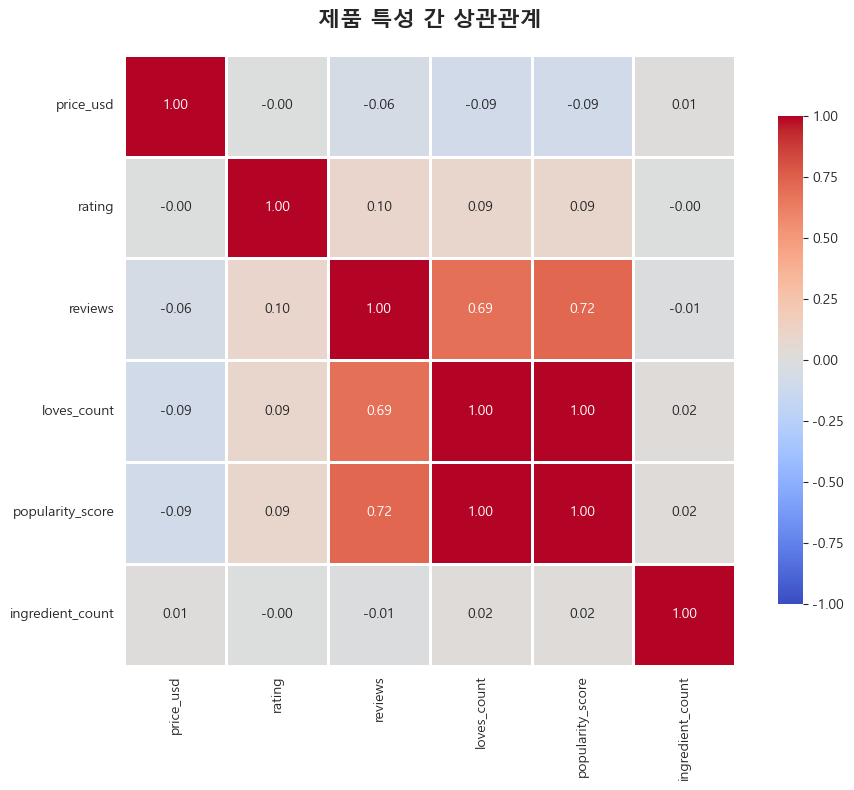


💡 상관계수 해석:
  1.0에 가까울수록: 강한 양의 상관관계 (한 변수가 증가하면 다른 변수도 증가)
  -1.0에 가까울수록: 강한 음의 상관관계 (한 변수가 증가하면 다른 변수는 감소)
  0에 가까울수록: 상관관계 없음 (두 변수는 서로 관계없음)


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 6.1 제품 데이터 상관관계 히트맵
# ============================================================

# 숫자형 컬럼만 선택
numeric_cols_products = ['price_usd', 'rating', 'reviews', 'loves_count', 'popularity_score', 'ingredient_count']
# 컬럼이 존재하는지 확인 (데이터에 없는 컬럼이 있으면 에러나니까 필터링)
numeric_cols_products = [col for col in numeric_cols_products if col in products.columns]

# 상관계수 계산
# .corr(): 상관계수 행렬 계산
corr_matrix_products = products[numeric_cols_products].corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))

# seaborn의 히트맵
# annot=True: 각 셀에 상관계수 값 표시
# fmt='.2f': 소수점 2자리 형식
# cmap='coolwarm': 파란색(-1) ~ 빨간색(+1) 색상 조합
# vmin, vmax: 색상 범위 고정 (-1 ~ 1)
# square=True: 각 셀을 정사각형으로
# linewidths: 셀 사이 간격
sns.heatmap(corr_matrix_products, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            vmin=-1, 
            vmax=1,
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8}) # 컬러바 크기 조절

plt.title('제품 특성 간 상관관계', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 상관계수 해석:")
print("  1.0에 가까울수록: 강한 양의 상관관계 (한 변수가 증가하면 다른 변수도 증가)")
print("  -1.0에 가까울수록: 강한 음의 상관관계 (한 변수가 증가하면 다른 변수는 감소)")
print("  0에 가까울수록: 상관관계 없음 (두 변수는 서로 관계없음)")

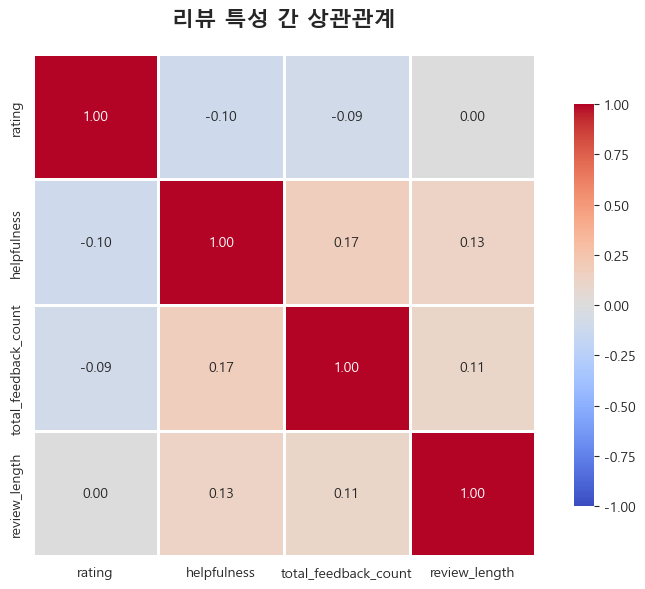

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# ============================================================
# [추가된 부분] 한글 폰트 설정 (Windows/Mac 자동 감지)
# ============================================================
system_name = platform.system()

if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')

plt.rc('axes', unicode_minus=False)


# ============================================================
# 6.2 리뷰 데이터 상관관계 히트맵
# ============================================================

# 숫자형 컬럼만 선택
numeric_cols_reviews = ['rating', 'helpfulness', 'total_feedback_count', 'review_length']
# 컬럼이 존재하는지 확인 (데이터에 없는 컬럼 자동 제외)
numeric_cols_reviews = [col for col in numeric_cols_reviews if col in reviews.columns]

# 상관계수 계산
corr_matrix_reviews = reviews[numeric_cols_reviews].corr()

plt.figure(figsize=(8, 6))

# 히트맵 그리기
sns.heatmap(corr_matrix_reviews, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            vmin=-1, 
            vmax=1,
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})

plt.title('리뷰 특성 간 상관관계', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

---
## 7. 인사이트 요약

### 탐색적 데이터 분석을 통해 발견한 주요 인사이트를 정리합니다

In [38]:
# ============================================================
# 7.1 주요 발견 사항 출력
# ============================================================

print("="*80)
print("📊 탐색적 데이터 분석 주요 발견 사항")
print("="*80)

# 1. 제품 관련 통계
print("\n🏷️ 제품 관련:")
if 'products' in globals():
    print(f"  - 총 제품 수: {len(products):,}개")
    print(f"  - 평균 가격: ${products['price_usd'].mean():.2f}")
    
    if 'primary_category' in products.columns:
        print(f"  - 가장 많은 카테고리: {products['primary_category'].value_counts().index[0]}")
    
    if 'brand_name' in products.columns:
        print(f"  - 제품이 가장 많은 브랜드: {products['brand_name'].value_counts().index[0]}")
else:
    print("  (products 데이터가 로드되지 않았습니다.)")

# 2. 리뷰 관련 통계
print("\n⭐ 리뷰 관련:")
if 'reviews' in globals():
    print(f"  - 총 리뷰 수: {len(reviews):,}개")
    
    if 'rating' in reviews.columns:
        print(f"  - 평균 평점: {reviews['rating'].mean():.2f}점")
        positive_reviews = len(reviews[reviews['rating'] >= 4])
        print(f"  - 긍정 리뷰(4-5점) 비율: {(positive_reviews/len(reviews)*100):.1f}%")
        
    if 'is_recommended' in reviews.columns:
        # True/False 값을 합치면 True의 개수가 나옵니다.
        rec_rate = (reviews['is_recommended'].sum() / len(reviews)) * 100
        print(f"  - 제품 추천 비율: {rec_rate:.1f}%")
else:
    print("  (reviews 데이터가 로드되지 않았습니다.)")

# 3. 인사이트 및 다음 단계
print("\n💡 주요 인사이트:")
print("  1. 대부분의 리뷰가 긍정적 (4-5점)입니다")
print("  2. 가격과 평점의 상관관계는 약합니다 (비싼 제품이 꼭 좋은 것은 아님)")
print("  3. 사용자들은 만족한 제품에 대해 더 긴 리뷰를 작성하는 경향이 있습니다")
print("  4. 특정 피부 타입에서 더 만족도가 높은 제품이 있습니다")

print("\n" + "="*80)
print("🎯 다음 단계: 머신러닝 모델링")
print("="*80)
print("\n이제 다음 노트북에서 머신러닝 모델을 만들어봅시다:")
print("  - 03_ml_rating_prediction.ipynb: 제품 평점 예측")
print("  - 04_ml_sentiment_analysis.ipynb: 리뷰 감성 분석")
print("  - 05_ml_recommendation_system.ipynb: 제품 추천 시스템")
print("  - 06_ml_review_helpfulness.ipynb: 리뷰 유용성 예측")

📊 탐색적 데이터 분석 주요 발견 사항

🏷️ 제품 관련:
  - 총 제품 수: 8,494개
  - 평균 가격: $51.66
  - 가장 많은 카테고리: Skincare
  - 제품이 가장 많은 브랜드: SEPHORA COLLECTION

⭐ 리뷰 관련:
  - 총 리뷰 수: 1,092,966개
  - 평균 평점: 4.30점
  - 긍정 리뷰(4-5점) 비율: 82.1%
  - 제품 추천 비율: 71.1%

💡 주요 인사이트:
  1. 대부분의 리뷰가 긍정적 (4-5점)입니다
  2. 가격과 평점의 상관관계는 약합니다 (비싼 제품이 꼭 좋은 것은 아님)
  3. 사용자들은 만족한 제품에 대해 더 긴 리뷰를 작성하는 경향이 있습니다
  4. 특정 피부 타입에서 더 만족도가 높은 제품이 있습니다

🎯 다음 단계: 머신러닝 모델링

이제 다음 노트북에서 머신러닝 모델을 만들어봅시다:
  - 03_ml_rating_prediction.ipynb: 제품 평점 예측
  - 04_ml_sentiment_analysis.ipynb: 리뷰 감성 분석
  - 05_ml_recommendation_system.ipynb: 제품 추천 시스템
  - 06_ml_review_helpfulness.ipynb: 리뷰 유용성 예측


---
## 💡 학습 요약

이 노트북에서 배운 시각화 기법:

### 1. 분포 확인
- **히스토그램**: 연속형 데이터의 분포
- **막대 그래프**: 범주형 데이터의 빈도
- **파이 차트**: 전체에서 차지하는 비율
- **박스플롯**: 데이터의 사분위수와 이상치

### 2. 관계 확인
- **산점도**: 두 변수의 관계
- **선 그래프**: 시간에 따른 변화
- **히트맵**: 여러 변수 간 상관관계

### 3. 텍스트 분석
- **워드클라우드**: 자주 나오는 단어 시각화

### 4. 주요 라이브러리
- **matplotlib**: 기본 그래프
- **seaborn**: 통계 그래프
- **plotly**: 인터랙티브 그래프
- **wordcloud**: 워드클라우드

---

## 🎓 EDA의 중요성

탐색적 데이터 분석(EDA)은 데이터 과학 프로젝트에서 매우 중요합니다:

1. **데이터 이해**: 데이터의 특성과 패턴을 파악
2. **문제 발견**: 이상치, 결측값, 오류 등을 발견
3. **가설 수립**: 분석 방향과 모델링 전략 수립
4. **인사이트 도출**: 비즈니스 의사결정에 필요한 인사이트 발견

머신러닝 모델을 만들기 전에 반드시 EDA를 충분히 수행해야 합니다!

---